# **ETL Y Análisis Exploratorio de Datos (EDA) para la cuenta AtravelerTeacher**

### Importar librerías

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from collections import Counter
from wordcloud import WordCloud

In [2]:
df=pd.read_excel("dataset_2024-11-20_posts reducido.xlsx")

In [3]:
df.head(10)

,id,caption,description,timestamp,displayUrl,videoUrl,ownerUsername,locationId,locationName,type,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,3.503655e+18,¿Qué opinan? Quisiera escucharles y después co...,NaN,2024-11-18T00:06:16.000Z,https://instagram.fabe1-1.fna.fbcdn.net/v/t51....,https://instagram.fabe1-1.fna.fbcdn.net/o1/v/t...,atravelerteacher,NaN,NaN,Video,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.502716e+18,¡Considero que del trabajo de escritorio que r...,NaN,2024-11-16T17:01:13.000Z,https://instagram.fybz1-1.fna.fbcdn.net/v/t51....,https://instagram.fybz1-1.fna.fbcdn.net/o1/v/t...,atravelerteacher,NaN,NaN,Video,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.505079e+18,Les dejo por aquí el artículo completo \n\nhtt...,NaN,2024-11-19T23:13:29.000Z,https://scontent-iad3-2.cdninstagram.com/v/t51...,NaN,atravelerteacher,NaN,NaN,Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.499991e+18,Esta publicación la hice algunos años reflexio...,NaN,2024-11-12T22:45:11.000Z,https://scontent-lga3-3.cdninstagram.com/v/t51...,NaN,atravelerteacher,213236545.0,"Medellín, Antioquia",Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.463781e+18,El momento educativo que nos toca vivir es muy...,NaN,2024-09-23T23:40:59.000Z,https://scontent-dfw5-1.cdninstagram.com/v/t51...,NaN,atravelerteacher,213236545.0,"Medellín, Antioquia",Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.500798e+18,Agradezco todas las versiones que fui porque d...,NaN,2024-11-14T01:27:57.000Z,https://scontent-phx1-1.cdninstagram.com/v/t51...,NaN,atravelerteacher,NaN,NaN,Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.504443e+18,Una estrategias muy sencilla que siempre está ...,NaN,2024-11-19T02:10:17.000Z,https://scontent-dfw5-1.cdninstagram.com/v/t51...,NaN,atravelerteacher,NaN,NaN,Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.505783e+18,¿Y tú qué te dirías?,NaN,2024-11-20T22:32:46.000Z,https://scontent-lhr6-1.cdninstagram.com/v/t51...,NaN,atravelerteacher,NaN,NaN,Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.501516e+18,¡Como profe siempre probando cosas nuevas y es...,NaN,2024-11-15T01:14:47.000Z,https://instagram.fcai21-3.fna.fbcdn.net/v/t51...,NaN,atravelerteacher,213236545.0,"Medellín, Antioquia",Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.497140e+18,Deseo que este fin de semana que comienza te v...,NaN,2024-11-09T00:20:06.000Z,https://scontent-dfw5-1.cdninstagram.com/v/t51...,NaN,atravelerteacher,NaN,NaN,Sidecar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'caption', 'description', 'timestamp', 'displayUrl', 'videoUrl',
       'ownerUsername', 'locationId', 'locationName', 'type', 'productType',
       'firstComment', 'likesCount', 'commentsCount', 'videoPlayCount',
       'videoViewCount', 'videoDuration', 'hashtags/0', 'hashtags/1',
       'hashtags/2', 'hashtags/3', 'hashtags/4', 'hashtags/5', 'hashtags/6',
       'hashtags/7', 'hashtags/8', 'hashtags/9', 'hashtags/10', 'hashtags/11',
       'hashtags/12', 'hashtags/13', 'hashtags/14', 'hashtags/15',
       'hashtags/16', 'hashtags/17', 'hashtags/18', 'hashtags/19',
       'hashtags/20', 'hashtags/21', 'hashtags/22', 'hashtags/23',
       'hashtags/24', 'hashtags/25', 'hashtags/26', 'hashtags/27',
       'hashtags/28', 'hashtags/29'],
      dtype='object')

In [5]:
df.iloc[:, 0:17].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1129 non-null   float64
 1   caption         1112 non-null   object 
 2   description     1 non-null      object 
 3   timestamp       1129 non-null   object 
 4   displayUrl      1129 non-null   object 
 5   videoUrl        660 non-null    object 
 6   ownerUsername   1129 non-null   object 
 7   locationId      473 non-null    float64
 8   locationName    473 non-null    object 
 9   type            1129 non-null   object 
 10  productType     660 non-null    object 
 11  firstComment    904 non-null    object 
 12  likesCount      1129 non-null   float64
 13  commentsCount   1129 non-null   float64
 14  videoPlayCount  553 non-null    float64
 15  videoViewCount  660 non-null    float64
 16  videoDuration   660 non-null    float64
dtypes: float64(7), object(10)
memory 

In [6]:
df.iloc[:, 17:35].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hashtags/0   720 non-null    object
 1   hashtags/1   708 non-null    object
 2   hashtags/2   701 non-null    object
 3   hashtags/3   698 non-null    object
 4   hashtags/4   688 non-null    object
 5   hashtags/5   679 non-null    object
 6   hashtags/6   662 non-null    object
 7   hashtags/7   650 non-null    object
 8   hashtags/8   645 non-null    object
 9   hashtags/9   635 non-null    object
 10  hashtags/10  625 non-null    object
 11  hashtags/11  620 non-null    object
 12  hashtags/12  617 non-null    object
 13  hashtags/13  614 non-null    object
 14  hashtags/14  609 non-null    object
 15  hashtags/15  607 non-null    object
 16  hashtags/16  607 non-null    object
 17  hashtags/17  603 non-null    object
dtypes: object(18)
memory usage: 159.0+ KB


In [7]:
df.iloc[:, 35:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hashtags/18  573 non-null    object
 1   hashtags/19  569 non-null    object
 2   hashtags/20  437 non-null    object
 3   hashtags/21  418 non-null    object
 4   hashtags/22  373 non-null    object
 5   hashtags/23  212 non-null    object
 6   hashtags/24  128 non-null    object
 7   hashtags/25  90 non-null     object
 8   hashtags/26  50 non-null     object
 9   hashtags/27  36 non-null     object
 10  hashtags/28  29 non-null     object
 11  hashtags/29  3 non-null      object
dtypes: object(12)
memory usage: 106.1+ KB


In [8]:
df["timestamp"]

0       2024-11-18T00:06:16.000Z
1       2024-11-16T17:01:13.000Z
2       2024-11-19T23:13:29.000Z
3       2024-11-12T22:45:11.000Z
4       2024-09-23T23:40:59.000Z
                  ...           
1125    2021-03-18T17:00:36.000Z
1126    2021-03-25T23:41:15.000Z
1127    2021-03-19T17:12:58.000Z
1128    2021-03-15T21:33:41.000Z
1129    2021-03-16T23:10:57.000Z
Name: timestamp, Length: 1130, dtype: object

In [9]:
df["timestamp"]=df["timestamp"].str.replace("[T]", " ", regex=True)
df["timestamp"]=df["timestamp"].str.replace(".0{3}Z", "", regex=True)

In [10]:
df["timestamp"]=pd.to_datetime(df["timestamp"],  format='%Y-%m-%d %H:%M:%S')

In [11]:
hashtag=[int(df[i].count()) for i in [i for i in df.columns if i.startswith("has")]]

In [12]:
df.drop(["description","displayUrl",  "videoUrl", "locationId", "hashtags/29"], axis=1, inplace=True)

In [13]:
df.iloc[:, 0:22].info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1129 non-null   float64       
 1   caption         1112 non-null   object        
 2   timestamp       1129 non-null   datetime64[ns]
 3   ownerUsername   1129 non-null   object        
 4   locationName    473 non-null    object        
 5   type            1129 non-null   object        
 6   productType     660 non-null    object        
 7   firstComment    904 non-null    object        
 8   likesCount      1129 non-null   float64       
 9   commentsCount   1129 non-null   float64       
 10  videoPlayCount  553 non-null    float64       
 11  videoViewCount  660 non-null    float64       
 12  videoDuration   660 non-null    float64       
 13  hashtags/0      720 non-null    object        
 14  hashtags/1      708 non-null    object        
 15  hash

1130

In [14]:
df["caption"]=df["caption"].str.strip()

In [15]:
df['caption'] = df['caption'].fillna('-')

In [16]:
df["firstComment"]=df["firstComment"].str.strip()

In [17]:
df["locationName"].value_counts()

locationName
Charlotte, North Carolina        188
Medellín, Antioquia              156
Concord, North Carolina           29
Carl A Furr Elementary School      6
Queenstown, New Zealand            4
                                ... 
East Haven, Connecticut            1
Boston Masachusset                 1
Sterling Memorial Library          1
Puerto Rico                        1
San Juan, Puerto Rico              1
Name: count, Length: 76, dtype: int64

In [18]:
df["ownerUsername"].value_counts()

ownerUsername
atravelerteacher       1090
the.teacher.program      35
reducativa.sofi           1
laprofedespanol           1
leyorincon                1
dianagomezc               1
Name: count, dtype: int64

In [19]:
df.drop(df[df["ownerUsername"].isnull()].index, axis=0, inplace=True)
df["ownerUsername"].isnull().sum()

np.int64(0)

In [20]:
df["locationName"]=df["locationName"].str.strip()

In [21]:
indices=df[df["locationName"].isnull()].index
df.loc[indices, "locationName"]="0"

In [22]:
df["type"]=df["type"].str.strip()
bool(df["type"].value_counts().sum()==len(df["type"]))

True

In [23]:
print(f"cantidad de no nulos {df['productType'].value_counts().sum()}")
print(f"cantidad de nulos {df['productType'].isnull().sum()}")
df["productType"].value_counts()

cantidad de no nulos 660
cantidad de nulos 469


productType
clips    553
igtv      80
feed      27
Name: count, dtype: int64

In [24]:
df["productType"]=df["productType"].str.strip()
df.loc[:, "productType"]

0       clips
1       clips
2         NaN
3         NaN
4         NaN
        ...  
1125    clips
1126      NaN
1127      NaN
1128      NaN
1129      NaN
Name: productType, Length: 1129, dtype: object

In [25]:
indices=df[df.loc[:, "productType"].isnull()].index
df.loc[indices, "productType"] = "0"

In [26]:
bool(df["likesCount"].value_counts().sum()==len(df["likesCount"]))

True

In [27]:
bool(df["commentsCount"].value_counts().sum()==len(df["commentsCount"]))

True

In [28]:
bool(df["commentsCount"].value_counts().sum()==len(df["commentsCount"]))

True

In [29]:
df.iloc[:,9:]

,commentsCount,videoPlayCount,videoViewCount,videoDuration,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28
0,47.0,26703.0,10816.0,90.022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,4217.0,1272.0,18.481,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,5.0,2698.0,1138.0,28.900,atravelerteacher,métododeestudios,herramientasparaaprenderapensar,pensarlomejorquepodemospensar,math,mathteacher,...,quintodeprimaria,maestra,primaria,educacionprimaria,materialdidactico,teachingmaterials,dualimmersionteacher,dualimmersion,tpt,teacherspayteachers
1126,336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.fillna({"videoPlayCount":0}, inplace=True)
df.fillna({"videoViewCount":0}, inplace=True)
df.fillna({"videoDuration":0}, inplace=True)
df[["likesCount", "commentsCount", "videoPlayCount", "videoViewCount"]]=df[["likesCount", "commentsCount", "videoPlayCount", "videoViewCount"]].astype({"likesCount":"int64", "commentsCount":"int64", "videoPlayCount":"int64", "videoViewCount":"int64"})

In [31]:
lista=[i for i in df.columns if i.startswith("has")]
lista
for i in lista:
    df.fillna({i:"-"}, inplace=True)

In [32]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [33]:
df.iloc[:,0:10].head(10)

,id,caption,timestamp,ownerUsername,locationName,type,productType,firstComment,likesCount,commentsCount
0,3.503655e+18,¿Qué opinan? Quisiera escucharles y después co...,2024-11-18 00:06:16,atravelerteacher,0,Video,clips,No me copa la idea de exponerlos ..,572,47
1,3.502716e+18,¡Considero que del trabajo de escritorio que r...,2024-11-16 17:01:13,atravelerteacher,0,Video,clips,Graciiiasssssss eres un Solllllll ❤️,111,50
2,3.505079e+18,Les dejo por aquí el artículo completo \n\nhtt...,2024-11-19 23:13:29,atravelerteacher,0,Sidecar,0,Genial muchas gracias por compartir,159,4
3,3.499991e+18,Esta publicación la hice algunos años reflexio...,2024-11-12 22:45:11,atravelerteacher,"Medellín, Antioquia",Sidecar,0,"Tanto romanticismo, yo feliz de decir adiós y ...",1468,48
4,3.463781e+18,El momento educativo que nos toca vivir es muy...,2024-09-23 23:40:59,atravelerteacher,"Medellín, Antioquia",Sidecar,0,Eso mismo: carga burocrática,38948,356
5,3.500798e+18,Agradezco todas las versiones que fui porque d...,2024-11-14 01:27:57,atravelerteacher,0,Sidecar,0,❤️,2281,37
6,3.504443e+18,Una estrategias muy sencilla que siempre está ...,2024-11-19 02:10:17,atravelerteacher,0,Sidecar,0,Me gustaría saber más sobre este tipo de exáme...,305,2
7,3.505783e+18,¿Y tú qué te dirías?,2024-11-20 22:32:46,atravelerteacher,0,Sidecar,0,NaN,72,0
8,3.501516e+18,¡Como profe siempre probando cosas nuevas y es...,2024-11-15 01:14:47,atravelerteacher,"Medellín, Antioquia",Sidecar,0,No crees?,171,4
9,3.497140e+18,Deseo que este fin de semana que comienza te v...,2024-11-09 00:20:06,atravelerteacher,0,Sidecar,0,Gracias,1525,32


In [34]:
df.iloc[:,10:25].head(10)

,videoPlayCount,videoViewCount,videoDuration,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,hashtags/6,hashtags/7,hashtags/8,hashtags/9,hashtags/10,hashtags/11
0,26703,10816,90.022,-,-,-,-,-,-,-,-,-,-,-,-
1,4217,1272,18.481,-,-,-,-,-,-,-,-,-,-,-,-
2,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
3,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
4,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
5,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
6,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
7,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
8,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
9,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-


In [35]:
df.iloc[:,25:-1].head(10)

,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,hashtags/17,hashtags/18,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27
0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [36]:
df = df.iloc[:,0:13]
df.head(3)

,id,caption,timestamp,ownerUsername,locationName,type,productType,firstComment,likesCount,commentsCount,videoPlayCount,videoViewCount,videoDuration
0,3.503655e+18,¿Qué opinan? Quisiera escucharles y después co...,2024-11-18 00:06:16,atravelerteacher,0,Video,clips,No me copa la idea de exponerlos ..,572,47,26703,10816,90.022
1,3.502716e+18,¡Considero que del trabajo de escritorio que r...,2024-11-16 17:01:13,atravelerteacher,0,Video,clips,Graciiiasssssss eres un Solllllll ❤️,111,50,4217,1272,18.481
2,3.505079e+18,Les dejo por aquí el artículo completo \n\nhtt...,2024-11-19 23:13:29,atravelerteacher,0,Sidecar,0,Genial muchas gracias por compartir,159,4,0,0,0.000


In [37]:
df_emotions = df
df_emotions = df_emotions.drop(['ownerUsername','locationName'], axis=1)

In [38]:
df_emotions['caption'] = df_emotions['caption'].str.strip()
word_length = df_emotions['word_length'] = df_emotions['caption'].apply(
    lambda comment: len(str(comment).split()) if isinstance(comment, str) else 0
)
word_length

0        14
1        45
2         8
3        77
4       112
       ... 
1124    131
1125     79
1126    138
1127     85
1128    145
Name: caption, Length: 1129, dtype: int64

In [39]:
df_emotions.columns

Index(['id', 'caption', 'timestamp', 'type', 'productType', 'firstComment',
       'likesCount', 'commentsCount', 'videoPlayCount', 'videoViewCount',
       'videoDuration', 'word_length'],
      dtype='object')

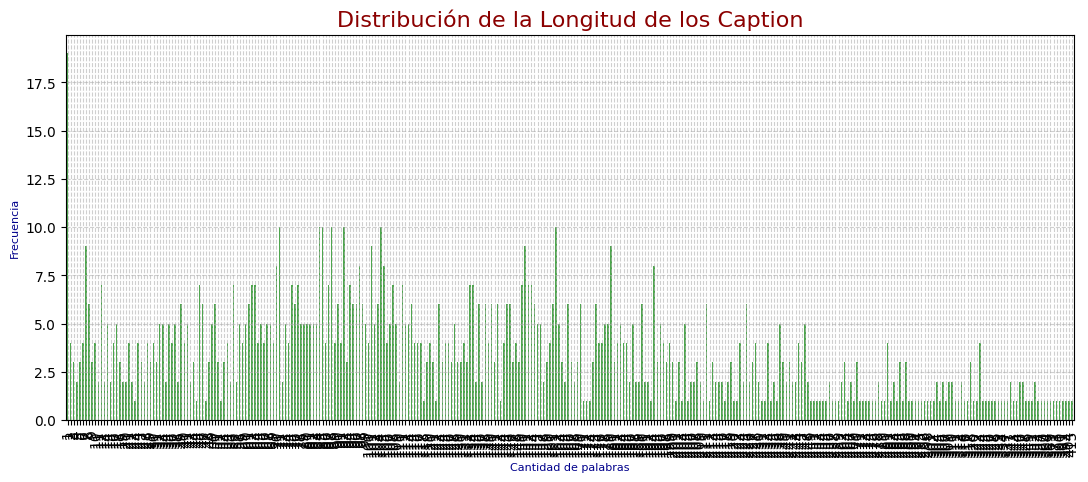

In [40]:
word_length = word_length = df_emotions['word_length'] = df_emotions['caption'].apply(
    lambda comment: len(str(comment).split()) if isinstance(comment, str) else 0
)
lenth_summary = word_length.value_counts().sort_index()
lenth_summary.plot(kind = 'bar', color = 'green', alpha = 0.7, figsize = (13,5))

plt.xlabel('Cantidad de palabras', fontsize=8, color='darkblue')
plt.ylabel('Frecuencia', fontsize=8, color='darkblue')
plt.title('Distribución de la Longitud de los Caption', fontsize=16, color='darkred')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [41]:
pd.set_option('display.max_colwidth', None)


In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Andrea X
[nltk_data]     Castano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
cust_sw = set()
tokenized_comment = df_emotions['caption'].apply(lambda x: TweetTokenizer(preserve_case=True).tokenize(text=x))
for ls in tokenized_comment:
    for wd in ls:
        if len(wd) <=2:
          cust_sw.add(wd)

stop_words = stopwords.words('spanish','english')
def remove_stop_words(comment):
  word_list = TweetTokenizer(preserve_case=True).tokenize(text=comment)
  return [word for word in word_list if word not in stop_words]

df_emotions['tokens'] = df_emotions['caption'].apply(lambda comment: remove_stop_words(comment))
all_tokens = []
for i in df_emotions['tokens']:
  all_tokens.extend(i)
token_count = Counter(all_tokens)

In [44]:
df_emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1129 non-null   float64       
 1   caption         1129 non-null   object        
 2   timestamp       1129 non-null   datetime64[ns]
 3   type            1129 non-null   object        
 4   productType     1129 non-null   object        
 5   firstComment    904 non-null    object        
 6   likesCount      1129 non-null   int64         
 7   commentsCount   1129 non-null   int64         
 8   videoPlayCount  1129 non-null   int64         
 9   videoViewCount  1129 non-null   int64         
 10  videoDuration   1129 non-null   float64       
 11  word_length     1129 non-null   int64         
 12  tokens          1129 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 114.8+ KB


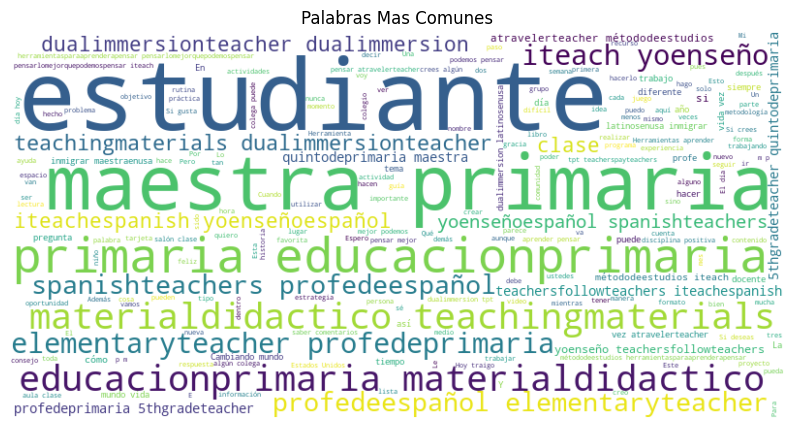

In [47]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Mas Comunes')
plt.show()

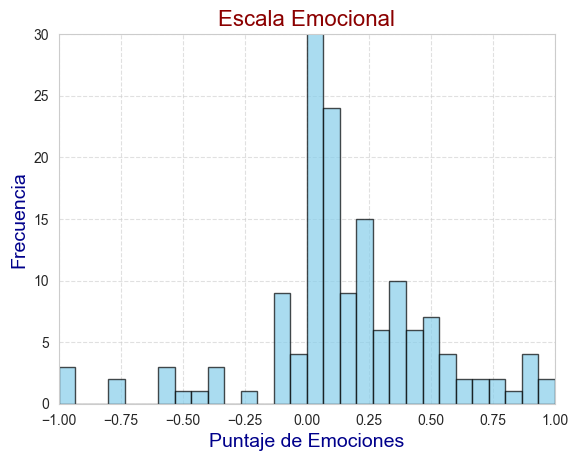

In [48]:
sns.set_style('whitegrid')
df_emotions['Sentiment_Score'] = df_emotions['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(df_emotions['Sentiment_Score'], bins = 30, edgecolor = 'black', color = 'skyblue', alpha = 0.7)
plt.xlabel('Puntaje de Emociones', fontsize = 14, color = 'darkblue')
plt.ylabel('Frecuencia', fontsize = 14, color = 'darkblue')
plt.title('Escala Emocional', fontsize=16, color='darkred')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-1, 1)
plt.ylim(0, 30)
plt.show()

#-1 representa un sentimiento muy negativo.
#0 representa un sentimiento neutral.
#1 representa un sentimiento muy positivo.

In [49]:
df_emotions.to_csv("df_emotions_caption_atravelerteacher.csv", index=False, header=True)

In [50]:
df_emotions.sort_values("Sentiment_Score", ascending=False).head(10)

,id,caption,timestamp,type,productType,firstComment,likesCount,commentsCount,videoPlayCount,videoViewCount,videoDuration,word_length,tokens,Sentiment_Score
966,2.687397e+18,"Let’s skip to the good part! \n\n¡Nuestra vida de por sí, ya es la mejor parte! Cada día tenemos en nuestras manos la posibilidad de transformar el mundo una vida a la vez \n\n¡Feliz inicio de semana para todos!",2021-10-18 18:46:49,Video,clips,NaN,53,0,2932,1121,15.533,39,"[Let, ’, s, skip, to, the, good, part, !, ¡, Nuestra, vida, ,, mejor, parte, !, Cada, día, manos, posibilidad, transformar, mundo, vida, vez, ¡, Feliz, inicio, semana, !]",1.000000
892,2.761478e+18,"¿Quieres conocer aplicaciones que hagan tus clases divertidas? Aquí te dejo el top 5 de mis estudiantes. \n\n¡Si quieres conocer más sobre estas aplicaciones, hemos dado varias clases gratuitas en nuestros perfiles! ¡Búscalas en nuestras guías ! \n\n¡Y qué date conectado para mucho más! \n\n¿Cuál es la aplicación favorita de tus estudiantes? \n\nSi crees que a algún colega le puede servir conocer un poco sobre esto ♥️✈️\n\nHerramientas para aprender a pensar lo mejor que podemos pensar.\n\n#atravelerteacher #métododeestudios #herramientasparaaprenderapensar #pensarlomejorquepodemospensar #iteach #yoenseño #teachersfollowteachers #iteachespanish #yoenseñoespañol #spanishteachers #profedeespañol #elementaryteacher #profedeprimaria #5thgradeteacher #quintodeprimaria #maestra #primaria #educacionprimaria #materialdidactico #teachingmaterials #dualimmersionteacher #dualimmersion #tpt #teacherspayteachers",2022-01-28 23:56:27,Video,clips,"Gracias, no conocía Blokeet",501,2,7986,4862,6.866,101,"[¿, Quieres, conocer, aplicaciones, hagan, clases, divertidas, ?, Aquí, dejo, top, 5, estudiantes, ., ¡, Si, quieres, conocer, aplicaciones, ,, dado, varias, clases, gratuitas, perfiles, !, ¡, Búscalas, guías, !, ¡, Y, date, conectado, !, ¿, Cuál, aplicación, favorita, estudiantes, ?, Si, crees, algún, colega, puede, servir, conocer, ♥, ️, ✈, ️, Herramientas, aprender, pensar, mejor, podemos, pensar, ., #atravelerteacher, #métododeestudios, #herramientasparaaprenderapensar, #pensarlomejorquepodemospensar, #iteach, #yoenseño, #teachersfollowteachers, #iteachespanish, #yoenseñoespañol, #spanishteachers, #profedeespañol, #elementaryteacher, #profedeprimaria, #5thgradeteacher, #quintodeprimaria, #maestra, #primaria, #educacionprimaria, #materialdidactico, #teachingmaterials, #dualimmersionteacher, #dualimmersion, #tpt, #teacherspayteachers]",0.976562
615,2.977919e+18,"Desde hace muchos años tomé la decisión de no trabajar los fines de semana porque estos días me gusta dedicarme a las otras cosas que me ayudan a tener paz y a mantener el equilibrio. \n\nAlgunas veces me ha sido más fácil y otras más difícil como cuando me mudé a Carolina del Norte y fui la primera profe de quinto grado del programa de inmersión en mi condado, así que no había nada hecho \n\nEn el tiempo en el colegio no me alcanzaba. Como me conozco, mantuve muy claro mi límite de no trabajar los fines de semana. Esto me implicó muchas veces quedarme hasta más tarde en el colegio en semana y aunque fue un sacrificio, no me costó tanto porque siempre pude respetar esas dos cosas fundamentales: dejar la siguiente semana lista y no trabajar los fines de semana. \n\nProfe, te animo a dos cosas en esta publicación: \n\n1. Organízate para dejar todo lo de la semana siguiente preparado. \n2. Márcate tus límites y sé fiel a ellos. No necesariamente tiene que ser no trabajar el fin de semana. Algunos profes me dicen que les gusta tener las tardes libres después del trabajo pues llegan muy cansados, pero que no les da pereza dedicar la tarde del domingo. Y eso es válido. Otros me dicen que prefieren madrugar y llegar 40 min. antes al trabajo (yo nunca sería capaz de hacer eso ). Y también es válido. \n\nEs cuestión de conocimiento y de ser fieles a lo que nos marcamos. \n\n No siempre vas a poder preparar la clase ideal Para mí la clase ideal consistiría e